In [85]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import preprocessing
import matplotlib.pyplot as plt
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.impute import SimpleImputer
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.experimental import enable_iterative_imputer
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score


In [2]:
df= pd.read_csv("/Users/fernandopradagorge/Documents/Universidad/Master Data Science and AI/Nuclio Projects/Entregables/Entregable_2_25FEB24/EntregableMachineLearning/sample_mmp.csv")

/var/folders/hn/58jsz1wd6jn8ypqlsj_ym3sc0000gn/T/ipykernel_10815/884727793.py:1: DtypeWarning: Columns (29,42) have mixed types. Specify dtype option on import or set low_memory=False.
  df= pd.read_csv("/Users/fernandopradagorge/Documents/Universidad/Master Data Science and AI/Nuclio Projects/Entregables/Entregable_2_25FEB24/EntregableMachineLearning/sample_mmp.csv")


In [3]:
df.head(5)

,Unnamed: 0,MachineIdentifier,ProductName,EngineVersion,AppVersion,AvSigVersion,IsBeta,RtpStateBitfield,IsSxsPassiveMode,DefaultBrowsersIdentifier,...,Census_FirmwareVersionIdentifier,Census_IsSecureBootEnabled,Census_IsWIMBootEnabled,Census_IsVirtualDevice,Census_IsTouchEnabled,Census_IsPenCapable,Census_IsAlwaysOnAlwaysConnectedCapable,Wdft_IsGamer,Wdft_RegionIdentifier,HasDetections
0,8427007,f1cd864e97bae82bdf96523e1a539121,win8defender,1.1.15100.1,4.18.1807.18075,1.273.1234.0,0,7.0,0,NaN,...,19951.0,0,NaN,0.0,0,0,0.0,0.0,11.0,1
1,8829090,fd5ba6f5b75325ec0423a6c67cc75942,win8defender,1.1.15100.1,4.18.1807.18075,1.273.1282.0,0,7.0,0,NaN,...,48753.0,0,0.0,0.0,0,0,0.0,1.0,3.0,0
2,2731904,4e628391e7cc7c482fb3286f486dbd25,win8defender,1.1.15100.1,4.9.10586.1106,1.273.781.0,0,7.0,0,NaN,...,33111.0,1,0.0,0.0,1,1,0.0,0.0,15.0,0
3,1359513,270a2e9d028144a4df12a9e3da79fba5,win8defender,1.1.15200.1,4.18.1807.18075,1.275.1639.0,0,7.0,0,NaN,...,48473.0,1,NaN,0.0,0,0,0.0,0.0,15.0,1
4,236059,06ca8fa8d32c2abdc5b3577d676b3269,win8defender,1.1.15200.1,4.18.1807.18075,1.275.511.0,0,7.0,0,NaN,...,4343.0,1,NaN,0.0,1,0,0.0,1.0,13.0,1


In [4]:
df.shape

(500000, 84)

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,500000.0,4.458888e+06,2.575619e+06,2.0,2227692.50,4461367.5,6.690936e+06,8.921471e+06
IsBeta,500000.0,2.000000e-06,1.414214e-03,0.0,0.00,0.0,0.000000e+00,1.000000e+00
RtpStateBitfield,498168.0,6.846207e+00,1.023049e+00,0.0,7.00,7.0,7.000000e+00,3.500000e+01
IsSxsPassiveMode,500000.0,1.724200e-02,1.301720e-01,0.0,0.00,0.0,0.000000e+00,1.000000e+00
DefaultBrowsersIdentifier,24061.0,1.652825e+03,1.004754e+03,1.0,788.00,1632.0,2.381000e+03,3.209000e+03
AVProductStatesIdentifier,498062.0,4.785091e+04,1.402309e+04,3.0,49480.00,53447.0,5.344700e+04,7.049200e+04
AVProductsInstalled,498062.0,1.326763e+00,5.229999e-01,1.0,1.00,1.0,2.000000e+00,5.000000e+00
AVProductsEnabled,498062.0,1.020714e+00,1.666080e-01,0.0,1.00,1.0,1.000000e+00,4.000000e+00
HasTpm,500000.0,9.878160e-01,1.097068e-01,0.0,1.00,1.0,1.000000e+00,1.000000e+00
CountryIdentifier,500000.0,1.080375e+02,6.306854e+01,1.0,51.00,97.0,1.620000e+02,2.220000e+02


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500000 entries, 0 to 499999
Data columns (total 84 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   Unnamed: 0                                         500000 non-null  int64  
 1   MachineIdentifier                                  500000 non-null  object 
 2   ProductName                                        500000 non-null  object 
 3   EngineVersion                                      500000 non-null  object 
 4   AppVersion                                         500000 non-null  object 
 5   AvSigVersion                                       500000 non-null  object 
 6   IsBeta                                             500000 non-null  int64  
 7   RtpStateBitfield                                   498168 non-null  float64
 8   IsSxsPassiveMode                                   500000 non-null  int64 

In [7]:
df2 = df.copy()

In [8]:
df2 = df.dropna(axis=1,thresh=df.shape[0]*0.9) # elimina columnas con un mínimo del 90% de info. se quedan en 75column

In [9]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500000 entries, 0 to 499999
Data columns (total 75 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   Unnamed: 0                                         500000 non-null  int64  
 1   MachineIdentifier                                  500000 non-null  object 
 2   ProductName                                        500000 non-null  object 
 3   EngineVersion                                      500000 non-null  object 
 4   AppVersion                                         500000 non-null  object 
 5   AvSigVersion                                       500000 non-null  object 
 6   IsBeta                                             500000 non-null  int64  
 7   RtpStateBitfield                                   498168 non-null  float64
 8   IsSxsPassiveMode                                   500000 non-null  int64 

In [10]:
df2 = df2.drop(["Unnamed: 0"], axis = 1)
#elimino Unnamed: 0

In [11]:
df2.set_index("MachineIdentifier", inplace = True)
#defino "MachineIdentifier" como index

In [12]:
df2.info(verbose=False)

<class 'pandas.core.frame.DataFrame'>
Index: 500000 entries, f1cd864e97bae82bdf96523e1a539121 to 7b45dc3537e17f16305c5983ca0a1cb9
Columns: 73 entries, ProductName to HasDetections
dtypes: float64(31), int64(17), object(25)
memory usage: 282.3+ MB


In [13]:

tipos = df2.dtypes
#  diccionario para contar las columnas por tipo
columnas_por_tipo = {}
for col, tipo in tipos.items():
    if tipo not in columnas_por_tipo:
        columnas_por_tipo[tipo] = 0
    columnas_por_tipo[tipo] += 1


for tipo, num_columnas in columnas_por_tipo.items():
    print(f"{tipo}: {num_columnas}")


object: 25
int64: 17
float64: 31


In [14]:
TARGET = 'HasDetections'

In [15]:
df2[TARGET].mean()

0.499906

In [16]:
df2[TARGET].value_counts(normalize= True)*100

HasDetections
0    50.0094
1    49.9906
Name: proportion, dtype: float64

In [17]:
lista_eliminar = ["AutoSampleOptIn", "OsBuildLab", "CityIdentifier","GeoNameIdentifier" ,"Census_InternalBatteryNumberOfCharges", "IsBeta", "Census_InternalPrimaryDisplayResolutionHorizontal", "Census_InternalPrimaryDisplayResolutionVertical", ]
#columnas a eliminar por no aportar información relevante al DF o que ya la tengo en otras columnas

In [18]:
df3 = df2.drop(lista_eliminar, axis = 1)

In [19]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 500000 entries, f1cd864e97bae82bdf96523e1a539121 to 7b45dc3537e17f16305c5983ca0a1cb9
Data columns (total 65 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   ProductName                                        500000 non-null  object 
 1   EngineVersion                                      500000 non-null  object 
 2   AppVersion                                         500000 non-null  object 
 3   AvSigVersion                                       500000 non-null  object 
 4   RtpStateBitfield                                   498168 non-null  float64
 5   IsSxsPassiveMode                                   500000 non-null  int64  
 6   AVProductStatesIdentifier                          498062 non-null  float64
 7   AVProductsInstalled                                498062 non-null  float64
 8   AVProductsEnabled     

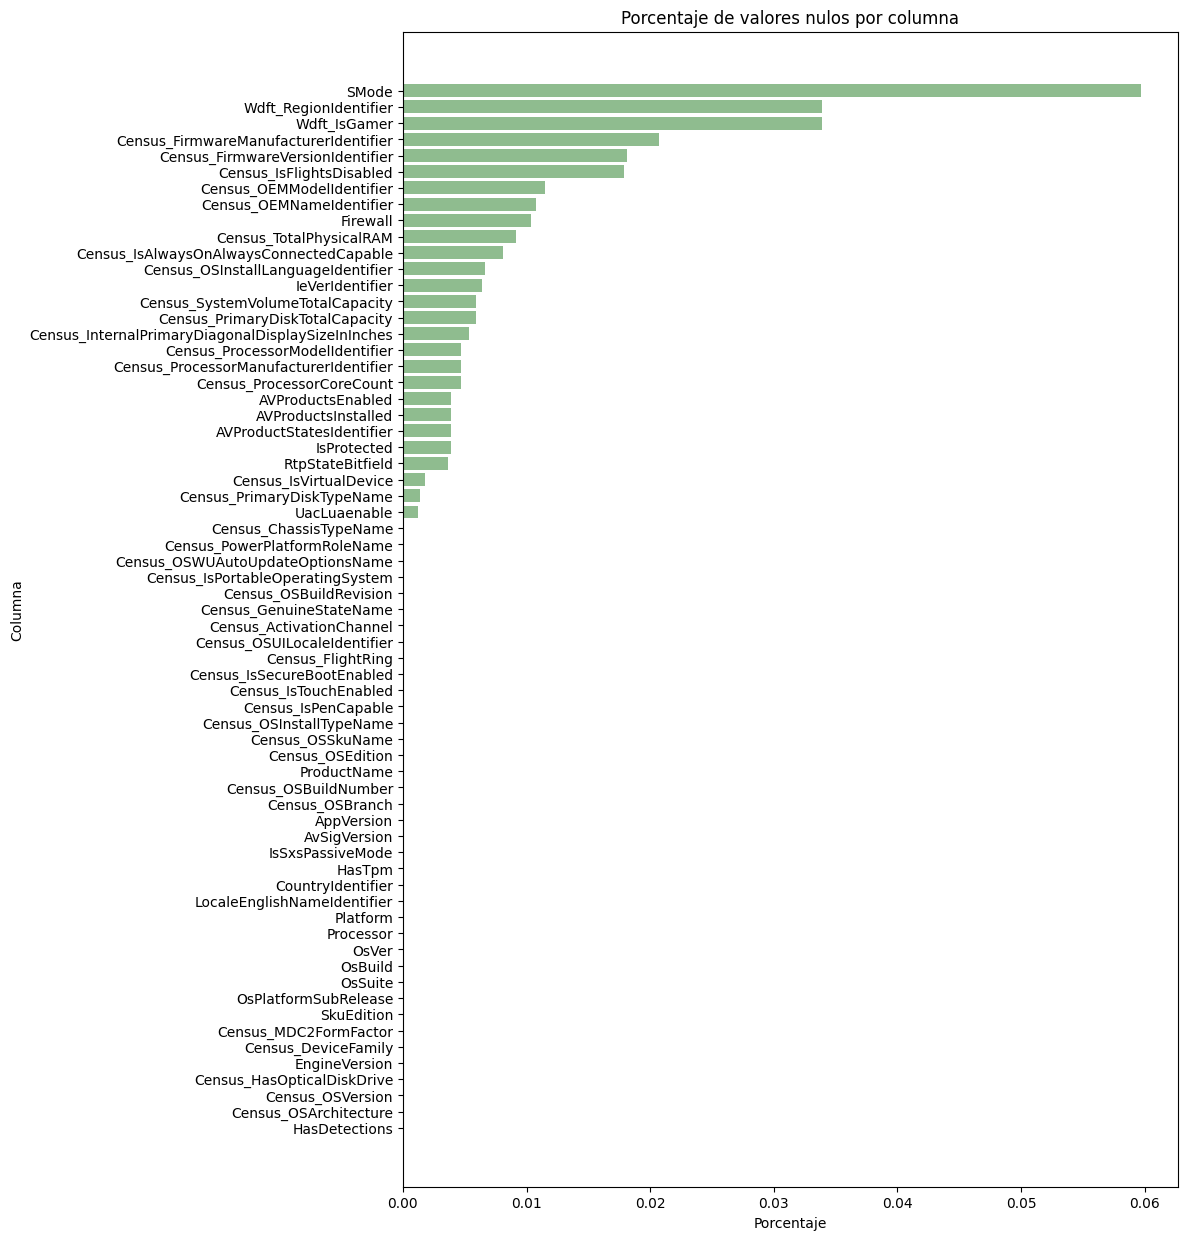

In [20]:
# Obtener el porcentaje de valores nulos por columna
df_null_values = df3.isnull().mean().sort_values(ascending=False)


fig, ax = plt.subplots(figsize=(10,15))

# Crear el gráfico de barras horizontal
ax.barh(y=df_null_values.index,  # Posicionar las barras según los índices
        width=df_null_values,  
        color='darkseagreen')  

# Invertir el eje Y para que las columnas aparezcan en orden correcto
ax.invert_yaxis()

plt.title('Porcentaje de valores nulos por columna')
plt.xlabel('Porcentaje')
plt.ylabel('Columna')


plt.show()


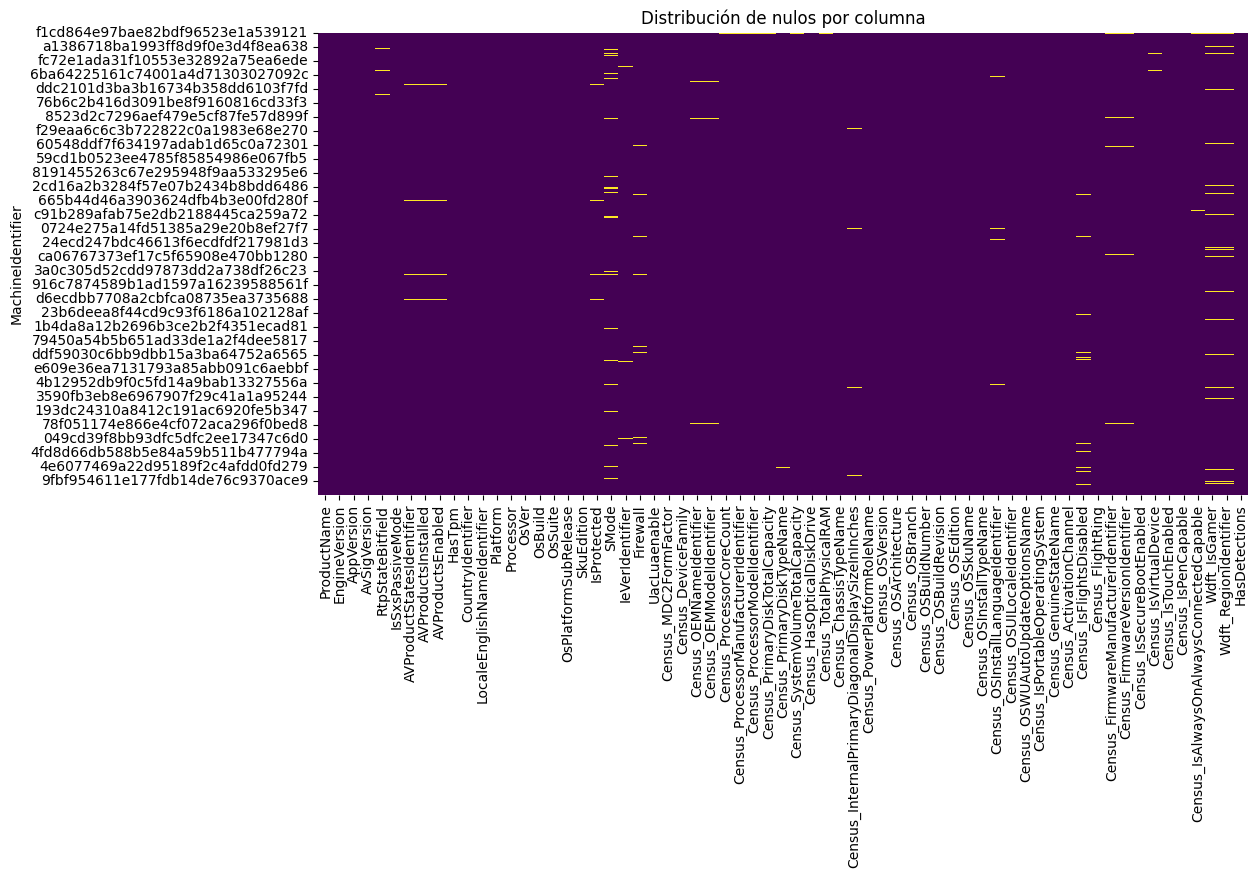

In [21]:
# Distribución de nulos 
plt.figure(figsize=(12, 6))
sns.heatmap(df3.isnull(), cbar=False, cmap='viridis')
plt.title('Distribución de nulos por columna')
plt.show()

In [22]:
#Compruebo las columnas que únicamente tienen 2 valores únicos 
var_bol = df3.nunique() == 2
columnas_con_dos = var_bol.loc[var_bol].index
columnas_con_dos

Index(['IsSxsPassiveMode', 'HasTpm', 'IsProtected', 'SMode', 'Firewall',
       'Census_HasOpticalDiskDrive', 'Census_IsPortableOperatingSystem',
       'Census_IsFlightsDisabled', 'Census_IsSecureBootEnabled',
       'Census_IsVirtualDevice', 'Census_IsTouchEnabled',
       'Census_IsPenCapable', 'Census_IsAlwaysOnAlwaysConnectedCapable',
       'Wdft_IsGamer', 'HasDetections'],
      dtype='object')

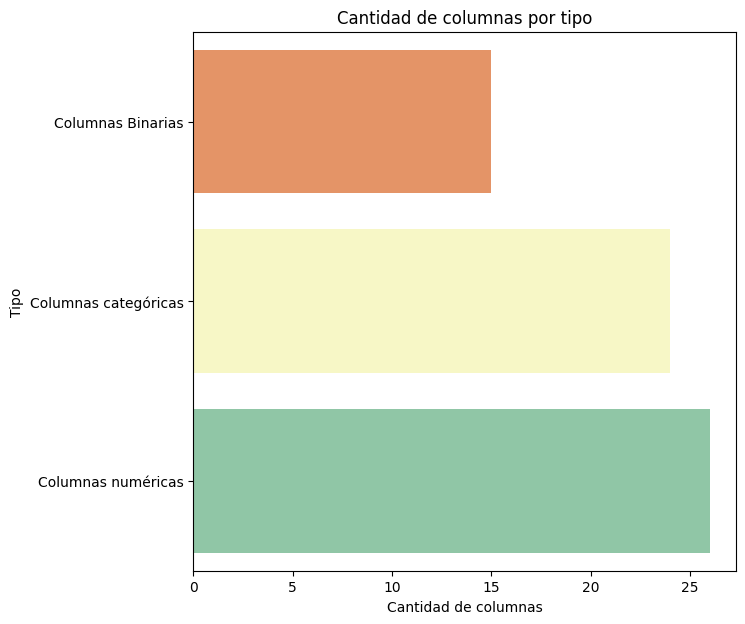

In [23]:
# Obtener información sobre registros no nulos
missing_df = pd.DataFrame({'Columna': df3.columns, 'Número de registros': df3.count(), 'Total': len(df3)}).sort_values("Número de registros", ascending=False)

# Obtener información sobre la cardinalidad
cardinality_df = pd.DataFrame({'Columna': df3.columns, 'Cardinality': df3.nunique()}).sort_values("Cardinality", ascending=False)
cardinality_df = cardinality_df[cardinality_df['Cardinality'] > 2]  # Filtrar columnas con más de 2 valores únicos

# Obtener información sobre el tipo de columnas
binary_columns = [col for col in df3.columns if df3[col].nunique() == 2]
true_numerical_columns = [col for col in df3.columns if pd.api.types.is_numeric_dtype(df3[col]) and col not in binary_columns]
categorical_columns = [col for col in df3.columns if col not in true_numerical_columns and col not in binary_columns]

type_df = pd.DataFrame({'Type': ['Columnas Binarias', 'Columnas numéricas', 'Columnas categóricas'],
                        'Conteo de Columnas': [len(binary_columns), len(true_numerical_columns), len(categorical_columns)]}).sort_values('Conteo de Columnas', ascending=True)


f, ax = plt.subplots(figsize=(7, 7))


sns.barplot(x="Conteo de Columnas", y="Type", data=type_df, palette='Spectral', hue = 'Type', legend=False)

plt.title('Cantidad de columnas por tipo')
plt.xlabel('Cantidad de columnas')
plt.ylabel('Tipo')

plt.show()



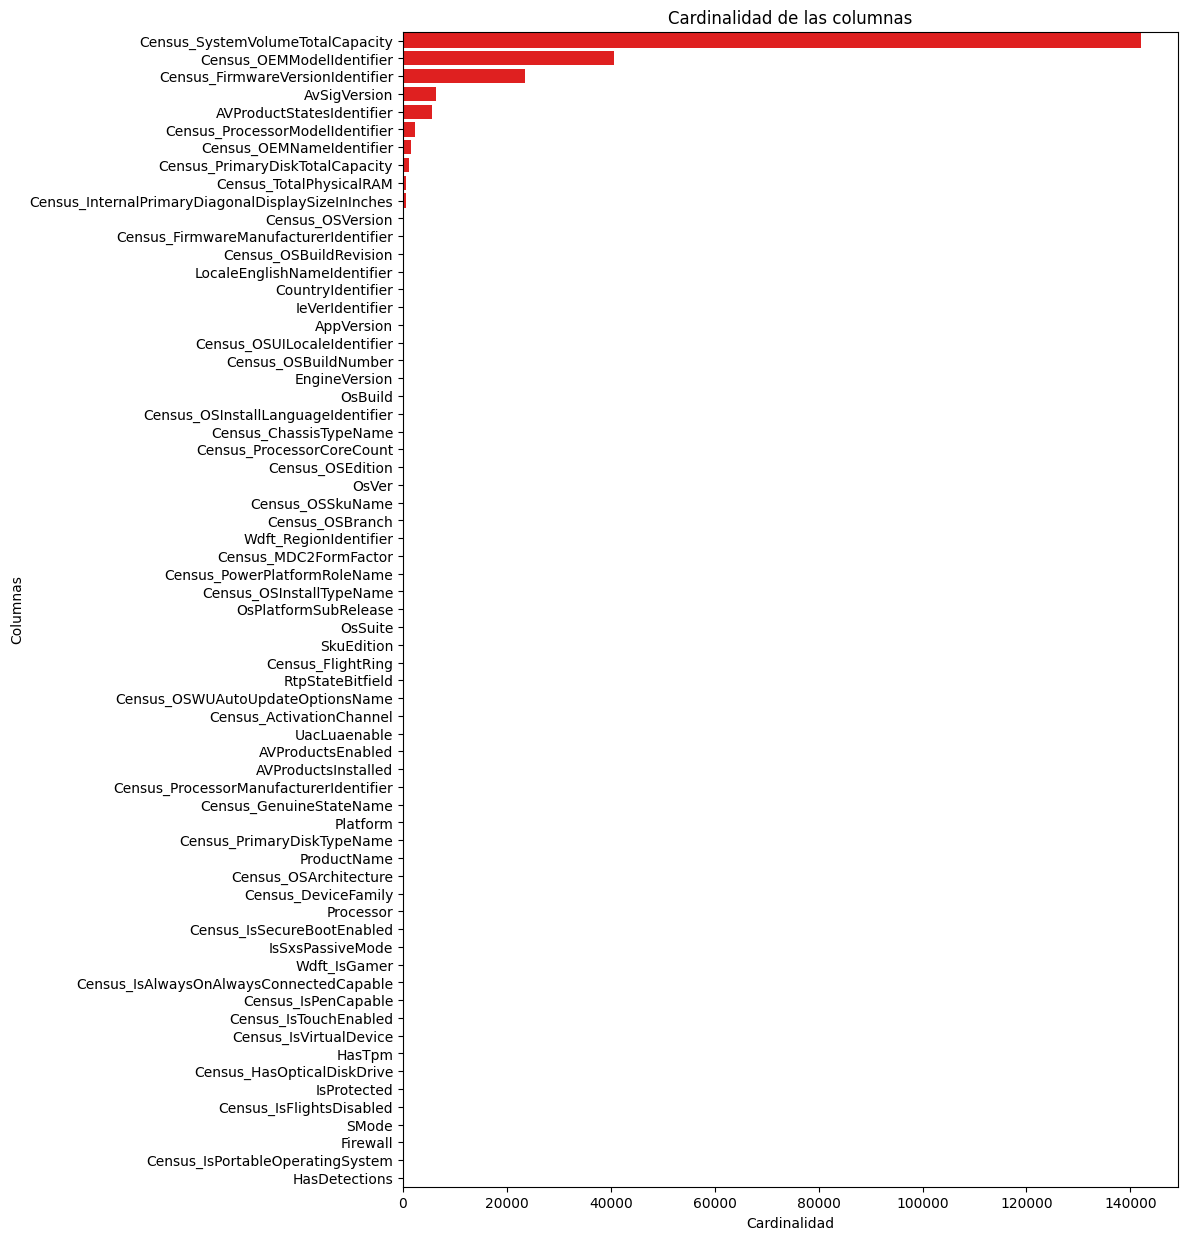

In [24]:
# Calcular la cardinalidad de cada columna
cardinalidad = df3.nunique()
df_cardinalidad = pd.DataFrame({'column': cardinalidad.index, 'cardinalidad': cardinalidad.values})
df_cardinalidad = df_cardinalidad.sort_values(by='cardinalidad', ascending=False)

fig, ax = plt.subplots(figsize=(10,15))
sns.barplot(x='cardinalidad', y='column', data=df_cardinalidad, color='red')

plt.title('Cardinalidad de las columnas')
plt.xlabel('Cardinalidad')
plt.ylabel('Columnas')

plt.show()

In [25]:
#true_numerical_columns = df2.select_dtypes(include=['number']).columns

# Distribución de valores por columna
#for col in true_numerical_columns:
    #plt.figure(figsize=(5, 4))
    #sns.displot(df2[col], kind="kde")
    #plt.title(f"Distribución de {col}")
    #plt.show()

In [26]:
# Detectar filas duplicadas
duplicados = df3.duplicated()

# Mostrar las filas duplicadas
df3[duplicados]


,ProductName,EngineVersion,AppVersion,AvSigVersion,RtpStateBitfield,IsSxsPassiveMode,AVProductStatesIdentifier,AVProductsInstalled,AVProductsEnabled,HasTpm,...,Census_FirmwareManufacturerIdentifier,Census_FirmwareVersionIdentifier,Census_IsSecureBootEnabled,Census_IsVirtualDevice,Census_IsTouchEnabled,Census_IsPenCapable,Census_IsAlwaysOnAlwaysConnectedCapable,Wdft_IsGamer,Wdft_RegionIdentifier,HasDetections
MachineIdentifier,,,,,,,,,,,,,,,,,,,,,
9474b685419b9f2724d18534ab5cbd85,win8defender,1.1.13504.0,4.11.15063.0,1.237.0.0,7.0,0,53447.0,1.0,1.0,1,...,142.0,9599.0,0,0.0,0,0,0.0,1.0,10.0,0
7012fe5425da96f1655f309d6d12e28d,win8defender,1.1.15100.1,4.18.1807.18075,1.273.1494.0,7.0,0,53447.0,1.0,1.0,1,...,628.0,44624.0,1,0.0,0,0,0.0,0.0,10.0,1
fe4ef602d39144f3044b8850e61b356d,win8defender,1.1.14104.0,4.12.16299.15,1.251.42.0,7.0,0,53447.0,1.0,1.0,1,...,NaN,NaN,1,0.0,0,0,NaN,0.0,3.0,0
a3fb6f71110964f3265bc769016cd714,win8defender,1.1.14600.4,4.13.17134.1,1.263.48.0,7.0,0,53447.0,1.0,1.0,1,...,554.0,33154.0,1,0.0,0,0,0.0,NaN,NaN,0
147718c19ad58925ee5d195fb82d74a7,win8defender,1.1.15200.1,4.12.16299.15,1.275.767.0,7.0,0,15911.0,2.0,1.0,1,...,486.0,46890.0,1,0.0,0,0,0.0,0.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
030d174dcbc5a20e58066104b44e8c69,win8defender,1.1.14104.0,4.12.16299.15,1.251.42.0,7.0,0,53447.0,1.0,1.0,1,...,142.0,51578.0,1,0.0,0,0,0.0,NaN,NaN,0
fe5b72e09b527dcf8effaf9fa4cd9350,win8defender,1.1.13504.0,4.11.15063.447,1.237.0.0,7.0,0,53447.0,1.0,1.0,1,...,556.0,63175.0,1,0.0,0,0,0.0,0.0,10.0,0
408bfa24b576ee36cc5ce1b35cb51b53,win8defender,1.1.15200.1,4.18.1807.18075,1.275.400.0,7.0,0,53447.0,1.0,1.0,1,...,486.0,52963.0,1,0.0,0,0,0.0,1.0,10.0,0


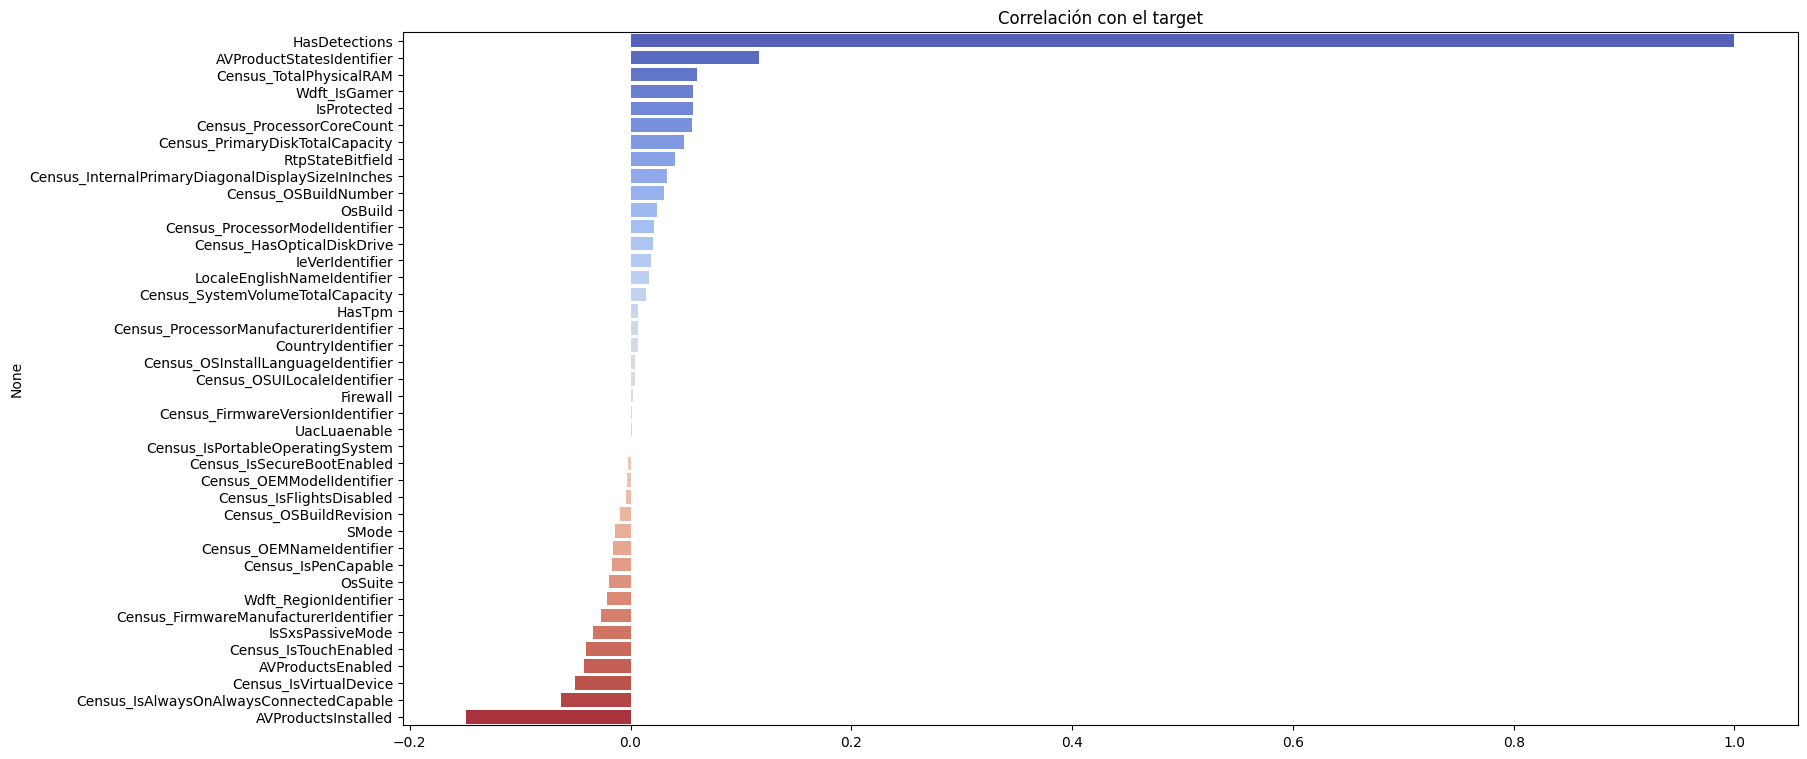

In [27]:
# Calcular la matriz de correlación con respecto a la variable objetivo
correlacion_numericas = df3.select_dtypes(include=['number']).corr()['HasDetections'].sort_values(ascending=False)

# Crear un gráfico de barras para visualizar la correlación
plt.figure(figsize=(18, 9))
sns.barplot(x=correlacion_numericas.values, y=correlacion_numericas.index, hue=correlacion_numericas.index, palette='coolwarm', legend=False)

plt.title('Correlación con el target')

plt.show()


In [28]:
def get_var_list(df):
    lista_numericas=[]
    lista_boolean=[]
    lista_categoricas=[]
    for i in df:
        if    (df[i].dtype.kind=="f" or df[i].dtype.kind=="i") and len(df[i].unique())!= 2  and i not in TARGET:
              lista_numericas.append(i)
        elif  (df[i].dtype.kind=="f" or df[i].dtype.kind=="i")  and len(df[i].unique())== 2  and i not in TARGET:
              lista_boolean.append(i)
        elif  (df[i].dtype.kind=="O")  and i not in TARGET:
              lista_categoricas.append(i)
                
    return lista_numericas, lista_boolean, lista_categoricas

In [29]:
lista_numericas, lista_boolean, lista_categoricas= get_var_list(df3)


In [30]:
lista_boolean

['IsSxsPassiveMode',
 'HasTpm',
 'Census_HasOpticalDiskDrive',
 'Census_IsPortableOperatingSystem',
 'Census_IsSecureBootEnabled',
 'Census_IsTouchEnabled',
 'Census_IsPenCapable']

In [31]:
def setOthers(dataframe, column, num_values):
    top_categories = dataframe[column].value_counts().head(num_values)
    top_categories_list = top_categories.index.to_list()
    top_categories_list.append('otros')
    dataframe[column] = pd.Categorical(dataframe[column], categories=top_categories_list)
    return dataframe[column].fillna('otros')

In [32]:
df3['Census_PrimaryDiskTypeName'] = setOthers(df3, 'Census_PrimaryDiskTypeName', 2)

In [33]:
df3["Census_PrimaryDiskTypeName"].describe()
#convertirlo a -1

count     500000
unique         3
top          HDD
freq      325429
Name: Census_PrimaryDiskTypeName, dtype: object

In [34]:
df3["Census_PrimaryDiskTypeName"].value_counts(dropna = False, normalize= True)*100

Census_PrimaryDiskTypeName
HDD      65.0858
SSD      27.6310
otros     7.2832
Name: proportion, dtype: float64

In [35]:
df3['Census_ChassisTypeName'] = setOthers(df3, 'Census_ChassisTypeName', 4)
df3["Census_ChassisTypeName"].value_counts(dropna = False, normalize= True)*100
df3['Census_PowerPlatformRoleName'] = setOthers(df3, 'Census_PowerPlatformRoleName', 2)
df3["Census_PowerPlatformRoleName"].value_counts(dropna = False, normalize= True)*100

Census_PowerPlatformRoleName
Mobile     69.2756
Desktop    23.2108
otros       7.5136
Name: proportion, dtype: float64

In [36]:
# Punto de control
df4 = df3.copy()

In [37]:
# Generar un boxplot para cada columna booleana
""" for columna in lista_boolean:
  sns.boxplot(x=columna, y='HasDetections', data=df2)
  plt.title(f'Distribución de {columna} en relación con HasDetections')
  plt.show()
"""

" for columna in lista_boolean:\n  sns.boxplot(x=columna, y='HasDetections', data=df2)\n  plt.title(f'Distribución de {columna} en relación con HasDetections')\n  plt.show()\n"

In [38]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
Index: 500000 entries, f1cd864e97bae82bdf96523e1a539121 to 7b45dc3537e17f16305c5983ca0a1cb9
Data columns (total 65 columns):
 #   Column                                             Non-Null Count   Dtype   
---  ------                                             --------------   -----   
 0   ProductName                                        500000 non-null  object  
 1   EngineVersion                                      500000 non-null  object  
 2   AppVersion                                         500000 non-null  object  
 3   AvSigVersion                                       500000 non-null  object  
 4   RtpStateBitfield                                   498168 non-null  float64 
 5   IsSxsPassiveMode                                   500000 non-null  int64   
 6   AVProductStatesIdentifier                          498062 non-null  float64 
 7   AVProductsInstalled                                498062 non-null  float64 
 8   AVProductsEn

### Limpieza

In [39]:
def setnumber(dataframe, column, num_values):
    top_categories = dataframe[column].value_counts().head(num_values)
    top_categories_list = top_categories.index.to_list()
    top_categories_list.append('-1.0')
    dataframe[column] = pd.to_numeric(dataframe[column], categories=top_categories_list)
    return dataframe[column].fillna('-1.0')
    #agrupa y cambia NAN a -1

In [40]:
def setfillna(dataframe, column):
    return dataframe[column].fillna('-1.0')
    # Cambia NAN -1

In [41]:
def setfillnamax(dataframe, column):
    return dataframe[column].fillna(df4["Census_IsVirtualDevice"].max(), inplace = True)
# Cambia NAN a la mayoria

In [42]:
lista_1 = ["AVProductsInstalled","AVProductsEnabled", "SMode", "Firewall","Census_FirmwareVersionIdentifier", "Census_SystemVolumeTotalCapacity", "Census_OSInstallLanguageIdentifier", "Census_IsFlightsDisabled", "Wdft_IsGamer"]
# lista a la que el NAN la convierto a -1

In [43]:
lista_mayoria = ["IsProtected", "Census_IsVirtualDevice", "Census_IsAlwaysOnAlwaysConnectedCapable" ]
#lista para convertir NAN en max
lista_agrup_1 = ["AVProductStatesIdentifier", "IeVerIdentifier", "UacLuaenable","Census_ProcessorManufacturerIdentifier", "Census_OEMNameIdentifier","Census_OEMModelIdentifier", "Census_ProcessorCoreCount","Census_PrimaryDiskTotalCapacity", "Census_TotalPhysicalRAM"  ]
#lista en la que agrupo por frecuencia (4 grupos) + NAN y el resto convierto a -1. Se quedan 5 grupos total
df4["Census_FirmwareManufacturerIdentifier"].value_counts(dropna = False, normalize= True)*100
#5 grupos
df4["Census_InternalPrimaryDiagonalDisplaySizeInInches"].value_counts(dropna = False, normalize= True)*100
#5 grupos
df4["Census_TotalPhysicalRAM"].value_counts(dropna = False, normalize= True)*100
#5 grupos
df4["Census_PrimaryDiskTotalCapacity"].value_counts(dropna = False, normalize= True)*100
#5 grupos
df4["Census_ProcessorCoreCount"].value_counts(dropna = False, normalize= True)*100
#5 grupos
df4["Census_OEMModelIdentifier"].value_counts(dropna = False, normalize= True)*100
#5grupos
df4["Census_OEMNameIdentifier"].value_counts(dropna = False, normalize= True)*100
#5 grupos
df4["IeVerIdentifier"].value_counts(dropna = False, normalize= True)*100
#5 grupos
df4["AVProductStatesIdentifier"].value_counts(dropna = False, normalize= True)*100
#2 grupos
df4["Wdft_RegionIdentifier"].value_counts(dropna = False, normalize= True)*100
#me quedo con 6 grupos

Wdft_RegionIdentifier
10.0    20.0784
11.0    15.1224
3.0     14.6138
1.0     13.7384
15.0    11.4692
7.0      6.6724
NaN      3.3900
8.0      3.1522
13.0     2.5362
5.0      2.2932
12.0     1.8230
6.0      1.7500
4.0      1.5172
9.0      0.9042
2.0      0.8940
14.0     0.0454
Name: proportion, dtype: float64

In [44]:
#Compruebo las columnas que únicamente tienen 1 valor 
num_valores_unicos = df4.nunique()
columnas_con_un_atributo = num_valores_unicos[num_valores_unicos == 1].index
columnas_con_un_atributo



Index([], dtype='object')

In [45]:
#df2.drop(columnas_con_un_atributo, axis=1, inplace=True)

In [46]:
#Creo una función para sacar aquellas columnas con un porcentaje de nulos superior al 75%
#def identificar_columnas_con_nulos(df, umbral_porcentaje=75):
    #porc_nulos = df3.isnull().mean() * 100
    #columnas_con_nulos = porc_nulos[porc_nulos > umbral_porcentaje].index.tolist()
    #return columnas_con_nulos

In [47]:
#columns_to_delete= identificar_columnas_con_nulos(df34
#columns_to_delete

In [48]:
#df2.drop(columns_to_delete, axis=1, inplace=True)

In [49]:
df4.head(2)

,ProductName,EngineVersion,AppVersion,AvSigVersion,RtpStateBitfield,IsSxsPassiveMode,AVProductStatesIdentifier,AVProductsInstalled,AVProductsEnabled,HasTpm,...,Census_FirmwareManufacturerIdentifier,Census_FirmwareVersionIdentifier,Census_IsSecureBootEnabled,Census_IsVirtualDevice,Census_IsTouchEnabled,Census_IsPenCapable,Census_IsAlwaysOnAlwaysConnectedCapable,Wdft_IsGamer,Wdft_RegionIdentifier,HasDetections
MachineIdentifier,,,,,,,,,,,,,,,,,,,,,
f1cd864e97bae82bdf96523e1a539121,win8defender,1.1.15100.1,4.18.1807.18075,1.273.1234.0,7.0,0,53447.0,1.0,1.0,1,...,355.0,19951.0,0,0.0,0,0,0.0,0.0,11.0,1
fd5ba6f5b75325ec0423a6c67cc75942,win8defender,1.1.15100.1,4.18.1807.18075,1.273.1282.0,7.0,0,53447.0,1.0,1.0,1,...,486.0,48753.0,0,0.0,0,0,0.0,1.0,3.0,0


In [50]:
def convertir_columnas_boolean(df, columnas_boolean):
    """Convierte las columnas especificadas a tipo booleano en un DataFrame."""
    for columna in columnas_boolean:
        df4[columna] = df4[columna].astype(bool)

# Lista de columnas booleanas obtenida de la función get_var_list
lista_boolean = get_var_list(df4)[1]  # Extraemos la lista booleana del resultado

# Convertir las columnas booleanas a tipo bool
convertir_columnas_boolean(df4, lista_boolean)


In [51]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
Index: 500000 entries, f1cd864e97bae82bdf96523e1a539121 to 7b45dc3537e17f16305c5983ca0a1cb9
Data columns (total 65 columns):
 #   Column                                             Non-Null Count   Dtype   
---  ------                                             --------------   -----   
 0   ProductName                                        500000 non-null  object  
 1   EngineVersion                                      500000 non-null  object  
 2   AppVersion                                         500000 non-null  object  
 3   AvSigVersion                                       500000 non-null  object  
 4   RtpStateBitfield                                   498168 non-null  float64 
 5   IsSxsPassiveMode                                   500000 non-null  bool    
 6   AVProductStatesIdentifier                          498062 non-null  float64 
 7   AVProductsInstalled                                498062 non-null  float64 
 8   AVProductsEn

In [52]:

#Eliminar las columnas
#df2 = df2.drop(columns=columnas_a_eliminar, axis=1)


In [53]:
df4= df4.reset_index()

In [54]:
#  Filtra un DataFrame por los valores que tienen una frecuencia superior al porcentaje mínimo especificado en una columna.

#def filtrar_por_valores_frecuentes(df4, columna, porcentaje_minimo=1):
  # Contar la frecuencia de cada valor único en la columna
  #conteos = df4[columna].value_counts()
  # Calcular el porcentaje de cada valor único
  #porcentajes = conteos / len(df4) * 100
  # Filtrar los valores con un porcentaje inferior al mínimo
  #valores_frecuentes = porcentajes[porcentajes > porcentaje_minimo].index
  # Filtrar el DataFrame original para incluir solo las filas con valores frecuentes
  #df4_filtrado = df4[df4[columna].isin(valores_frecuentes)]

  #return df_filtrado

#df4_filtrado = filtrar_por_valores_frecuentes(df4, "UacLuaenable", 1)

In [55]:
# Esto es necesario??

#pd.set_option('display.max_columns', None)
#pd.set_option('display.max_rows', None)     # Mostrar todas las filas

#df4.head().T

In [56]:
#Elimino las columnas con mucha cardinalidad a excepción de AvSigVersion , MachineIdentifier, Census_SystemVolumeTotalCapacity, y Census_TotalPhysicalRAM

In [57]:
lista_boolean

['IsSxsPassiveMode',
 'HasTpm',
 'Census_HasOpticalDiskDrive',
 'Census_IsPortableOperatingSystem',
 'Census_IsSecureBootEnabled',
 'Census_IsTouchEnabled',
 'Census_IsPenCapable']

In [58]:
lista_numericas

['RtpStateBitfield',
 'AVProductStatesIdentifier',
 'AVProductsInstalled',
 'AVProductsEnabled',
 'CountryIdentifier',
 'LocaleEnglishNameIdentifier',
 'OsBuild',
 'OsSuite',
 'IsProtected',
 'SMode',
 'IeVerIdentifier',
 'Firewall',
 'UacLuaenable',
 'Census_OEMNameIdentifier',
 'Census_OEMModelIdentifier',
 'Census_ProcessorCoreCount',
 'Census_ProcessorManufacturerIdentifier',
 'Census_ProcessorModelIdentifier',
 'Census_PrimaryDiskTotalCapacity',
 'Census_SystemVolumeTotalCapacity',
 'Census_TotalPhysicalRAM',
 'Census_InternalPrimaryDiagonalDisplaySizeInInches',
 'Census_OSBuildNumber',
 'Census_OSBuildRevision',
 'Census_OSInstallLanguageIdentifier',
 'Census_OSUILocaleIdentifier',
 'Census_IsFlightsDisabled',
 'Census_FirmwareManufacturerIdentifier',
 'Census_FirmwareVersionIdentifier',
 'Census_IsVirtualDevice',
 'Census_IsAlwaysOnAlwaysConnectedCapable',
 'Wdft_IsGamer',
 'Wdft_RegionIdentifier']

In [59]:
lista_categoricas

['ProductName',
 'EngineVersion',
 'AppVersion',
 'AvSigVersion',
 'Platform',
 'Processor',
 'OsVer',
 'OsPlatformSubRelease',
 'SkuEdition',
 'Census_MDC2FormFactor',
 'Census_DeviceFamily',
 'Census_PrimaryDiskTypeName',
 'Census_ChassisTypeName',
 'Census_PowerPlatformRoleName',
 'Census_OSVersion',
 'Census_OSArchitecture',
 'Census_OSBranch',
 'Census_OSEdition',
 'Census_OSSkuName',
 'Census_OSInstallTypeName',
 'Census_OSWUAutoUpdateOptionsName',
 'Census_GenuineStateName',
 'Census_ActivationChannel',
 'Census_FlightRing']

In [60]:
columns_to_kill = ['AutoSampleOptIn',
'Census_InternalBatteryNumberOfCharges',
'Census_InternalBatteryType',
'Census_IsFlightingInternal',
'Census_IsFlightsDisabled',
'Census_IsWIMBootEnabled',
'Census_ProcessorClass',
'Census_ThresholdOptIn',
'DefaultBrowsersIdentifier',
'IsBeta',
'ProductName',
'PuaMode',
'UacLuaenable',
'Unnamed: 0']

In [61]:
columns_to_drop = [col for col in columns_to_kill if col in df4.columns]
df4 = df4.drop(columns = columns_to_drop)

In [62]:
df4.head()

,MachineIdentifier,EngineVersion,AppVersion,AvSigVersion,RtpStateBitfield,IsSxsPassiveMode,AVProductStatesIdentifier,AVProductsInstalled,AVProductsEnabled,HasTpm,...,Census_FirmwareManufacturerIdentifier,Census_FirmwareVersionIdentifier,Census_IsSecureBootEnabled,Census_IsVirtualDevice,Census_IsTouchEnabled,Census_IsPenCapable,Census_IsAlwaysOnAlwaysConnectedCapable,Wdft_IsGamer,Wdft_RegionIdentifier,HasDetections
0,f1cd864e97bae82bdf96523e1a539121,1.1.15100.1,4.18.1807.18075,1.273.1234.0,7.0,False,53447.0,1.0,1.0,True,...,355.0,19951.0,False,0.0,False,False,0.0,0.0,11.0,1
1,fd5ba6f5b75325ec0423a6c67cc75942,1.1.15100.1,4.18.1807.18075,1.273.1282.0,7.0,False,53447.0,1.0,1.0,True,...,486.0,48753.0,False,0.0,False,False,0.0,1.0,3.0,0
2,4e628391e7cc7c482fb3286f486dbd25,1.1.15100.1,4.9.10586.1106,1.273.781.0,7.0,False,46781.0,2.0,1.0,True,...,554.0,33111.0,True,0.0,True,True,0.0,0.0,15.0,0
3,270a2e9d028144a4df12a9e3da79fba5,1.1.15200.1,4.18.1807.18075,1.275.1639.0,7.0,False,53447.0,1.0,1.0,True,...,142.0,48473.0,True,0.0,False,False,0.0,0.0,15.0,1
4,06ca8fa8d32c2abdc5b3577d676b3269,1.1.15200.1,4.18.1807.18075,1.275.511.0,7.0,False,47238.0,2.0,1.0,True,...,355.0,4343.0,True,0.0,True,False,0.0,1.0,13.0,1


In [63]:
df4["EngineVersion"].value_counts().sort_values(ascending = False)

EngineVersion
1.1.15200.1    216491
1.1.15100.1    205494
1.1.15000.2     14752
1.1.14901.4     11984
1.1.14600.4      9005
1.1.14800.3      7548
1.1.15300.6      6769
1.1.14104.0      5240
1.1.15300.5      3883
1.1.13504.0      3876
1.1.14700.5      2593
1.1.14500.5      2591
1.1.14405.2      1972
1.1.14306.0      1329
1.1.14202.0       840
1.1.14003.0       804
1.1.13303.0       516
1.1.13903.0       515
1.1.13804.0       513
1.1.13407.0       479
1.1.13601.0       420
1.1.12902.0       321
1.1.14305.0       270
1.1.13701.0       255
1.1.13704.0       255
1.1.13202.0       245
1.1.13103.0       235
1.1.13000.0       220
1.1.15000.1       138
1.1.12805.0       115
1.1.14901.3        71
1.1.14700.4        65
1.1.14700.3        61
1.1.14800.1        51
1.1.14500.2        19
1.1.14201.0        11
1.1.14303.0        10
1.1.12101.0         7
1.1.14103.0         5
1.1.13902.0         4
1.1.13802.0         4
1.1.12804.0         4
1.1.13803.0         3
1.1.12603.0         3
1.1.11701.0       

In [64]:
list_frequency_encoding = ['AppVersion',
 'AvSigVersion',
 'Census_OSVersion',
 'EngineVersion',
 ]

def frequency_encoding(feature):
    # Contamos la frecuencia de cada valor único en la característica y resetear el índice
    t = df4[feature].value_counts().reset_index(drop=True)
    # Asignamos un rango iniciando en 1 a los valores basándose en su frecuencia
    # Los valores que aparecen solo una vez obtendrán el valor NaN
    t.loc[t == 1] = np.nan
    # Creamos un DataFrame a partir de la Serie
    t = t.to_frame()
    # Reseteamos el índice como el nuevo índice
    t.set_index(t.index, inplace=True)
    # Devolvemos el diccionario de codificación
    max_label = t.max() + 1
    t.fillna(max_label, inplace=True)
    return t.to_dict('series')

# Codificamos todas las características en 'list_frequency_encoding'
for feature in list_frequency_encoding:
    # Obtenemos el diccionario de codificación de frecuencia para la característica
    freq_enc_dict = frequency_encoding(feature)
    # Mapeamos la codificación de frecuencia de vuelta al DataFrame
    df4[feature] = df4[feature].map(freq_enc_dict)
    # Convertimos el tipo de datos de la característica codificada
    df4[feature] = df4[feature].astype(pd.Int64Dtype())

In [65]:
df4_impute = ColumnTransformer(
    transformers = [
       ("impute_constant_m1", SimpleImputer(strategy = "constant", fill_value = -1), [lista_boolean]),
       ("")
 ],
    remainder = "passthrough"
)

In [66]:
df4.isnull().sum()

MachineIdentifier                               0
EngineVersion                              500000
AppVersion                                 500000
AvSigVersion                               500000
RtpStateBitfield                             1832
                                            ...  
Census_IsPenCapable                             0
Census_IsAlwaysOnAlwaysConnectedCapable      4040
Wdft_IsGamer                                16950
Wdft_RegionIdentifier                       16950
HasDetections                                   0
Length: 63, dtype: int64

In [67]:
#Lista de columnas para OneHotEncoder
columns_to_ohe = ['MachineIdentifier',
 'ProductName',
 'EngineVersion',
 'AppVersion',
 'AvSigVersion',
 'Platform',
 'Processor',
 'OsVer',
 'OsPlatformSubRelease',
 'OsBuildLab',
 'SkuEdition',
 'PuaMode',
 'SmartScreen',
 'Census_MDC2FormFactor',
 'Census_DeviceFamily',
 'Census_ProcessorClass',
 'Census_PrimaryDiskTypeName',
 'Census_ChassisTypeName',
 'Census_PowerPlatformRoleName',
 'Census_InternalBatteryType',
 'Census_OSVersion',
 'Census_OSArchitecture',
 'Census_OSBranch',
 'Census_OSEdition',
 'Census_OSSkuName',
 'Census_OSInstallTypeName',
 'Census_OSWUAutoUpdateOptionsName',
 'Census_GenuineStateName',
 'Census_ActivationChannel',
 'Census_FlightRing'] 

# Lista de columnas para Frequency Encoding
columns_to_frequency = ['Unnamed: 0',
 'RtpStateBitfield',
 'DefaultBrowsersIdentifier',
 'AVProductStatesIdentifier',
 'AVProductsInstalled',
 'AVProductsEnabled',
 'CountryIdentifier',
 'CityIdentifier',
 'OrganizationIdentifier',
 'GeoNameIdentifier',
 'LocaleEnglishNameIdentifier',
 'OsBuild',
 'OsSuite',
 'IsProtected',
 'SMode',
 'IeVerIdentifier',
 'Firewall',
 'UacLuaenable',
 'Census_OEMNameIdentifier',
 'Census_OEMModelIdentifier',
 'Census_ProcessorCoreCount',
 'Census_ProcessorManufacturerIdentifier',
 'Census_ProcessorModelIdentifier',
 'Census_PrimaryDiskTotalCapacity',
 'Census_SystemVolumeTotalCapacity',
 'Census_FirmwareVersionIdentifier',
 'Census_IsVirtualDevice',
 'Census_IsAlwaysOnAlwaysConnectedCapable',
 'Wdft_IsGamer',
 'Wdft_RegionIdentifier']

columns_to_most_frequency = ['MachineIdentifier',
 'ProductName',
 'EngineVersion',
 'AppVersion',
 'AvSigVersion',
 'Platform',
 'Processor',
 'OsVer',
 'OsPlatformSubRelease',
 'OsBuildLab',
 'SkuEdition',
 'PuaMode',
 'SmartScreen',
 'Census_MDC2FormFactor',
 'Census_DeviceFamily',
 'Census_ProcessorClass',
 'Census_PrimaryDiskTypeName',
 'Census_ChassisTypeName',
 'Census_PowerPlatformRoleName',
 'Census_InternalBatteryType',
 'Census_OSVersion',
 'Census_OSArchitecture',
 'Census_OSBranch',
 'Census_OSEdition',
 'Census_OSSkuName',
 'Census_OSInstallTypeName',
 'Census_OSWUAutoUpdateOptionsName',
 'Census_GenuineStateName',
 'Census_ActivationChannel',
 'Census_FlightRing']

In [75]:
def frequency_encoding(series):
    """Devuelve una serie donde cada elemento se reemplaza por su frecuencia de aparición en la serie original."""
    return series.map(series.value_counts(normalize=True))

In [74]:
# Pipeline para datos numéricos
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value=-1), columns_to_frequency)
])


In [72]:

# Preprocesamiento para datos categóricos con OneHotEncoder
categorical_transformer_ohe = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

In [79]:

class FrequencyEncoder(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        self.freq_map = X.apply(lambda x: x.map(x.value_counts(normalize=True)))
        return self
    
    def transform(self, X, y=None):
        X_transformed = X.copy()
        for column in X.columns:
            X_transformed[column] = X[column].map(self.freq_map[column])
        return X_transformed


In [82]:
# Preprocesamiento para datos categóricos con Frequency Encoding
categorical_transformer_frequency = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('frequency', FrequencyEncoder())
])

In [83]:
# Combinamos las  transformaciones usando ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('ohe', categorical_transformer_ohe, columns_to_ohe),
        ('frequency', categorical_transformer_frequency, columns_to_frequency)
    ],
    remainder='drop'
)

NameError: name 'categorical_transformer_ohe' is not defined

In [70]:
# División en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Identificación de características numéricas y categóricas
numeric_features = X_train.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X_train.select_dtypes(include=['object', 'category']).columns


NameError: name 'X_train' is not defined

In [ ]:
# Pipeline general que incluye preprocesamiento y el modelo
model_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', DecisionTreeClassifier(random_state=42))
])

# Entrenamiento del modelo con la pipeline
model_pipeline.fit(X_train, y_train)


In [ ]:
# Predicción con el conjunto de prueba utilizando la pipeline
y_pred = model_pipeline.predict(X_test)

# Evaluación del modelo
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy del modelo: {accuracy}')


In [ ]:

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

# Identificación de características numéricas y categóricas
numeric_features = X_train.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X_train.select_dtypes(include=['object']).columns

# Pipeline para datos numéricos
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean'))  # Cambiado a 'mean' para un enfoque más típico
])

# Pipeline para datos categóricos
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combinar transformaciones para datos numéricos y categóricos
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])


In [ ]:

from sklearn.tree import DecisionTreeClassifier

# Pipeline general que incluye preprocesamiento y el modelo
model_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', DecisionTreeClassifier(max_depth=10, random_state=42))  # Añadido max_depth para evitar sobreajuste
])

# Entrenamiento del modelo con la pipeline
model_pipeline.fit(X_train, y_train)


In [ ]:
# Predicción con el conjunto de prueba utilizando la pipeline
y_pred = model_pipeline.predict(X_test)

# Evaluación del modelo
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy del modelo: {accuracy}')
